### Instrucciones
1. Sin utilizar las bibliotecas de *scikit-learn* para regresión lineal, elabora un programa en Python que implemente **BGD monovariable sin sesgo**.

### Entrada
- Archivo `casas.csv`
- Número de iteraciones
- Peso inicial
- Valor de α (learning rate)

### Procedimiento
- Divide `casas.csv` en:
  - 70% para entrenamiento
  - 30% para pruebas  
  Usando los parámetros:  
  `shuffle=True` y `random_state=0`.

### Salida
(Ver ejemplo de la **Figura 1**)

- Peso en cada iteración calculado con el conjunto de entrenamiento.
- Valores `y_test`.
- Valores `y_pred` en cada iteración.
- Error de estimación:  

  $
  \sigma = \sum_{i=1}^{n} (y_{pred_i} - y_{test_i})
  $

- **Gráfica 1**
  - Distribución de los datos de prueba
  - Valores `y_pred` en cada iteración
- **Gráfica 2**
  - Error de estimación de cada iteración

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

$$Y = XW$$

In [50]:
def predict(X, weights):
    return X.dot(weights)

  $$
  \sigma = \sum_{i=1}^{n} (y_{pred_i} - y_{test_i})
  $$

In [51]:
def error(y_true, y_pred):
    """Mean squared error"""
    return sum(abs(y_pred - y_true))

$$ \frac{\partial \sigma}{\partial w} = (w \times X - Y) \cdot X$$

In [52]:
def gradient(index, W, X, Y):
    Y_pred = W[index] * X.T[index]
    print("=== W: ", W[index])
    print("=== X: ", X.T[index])
    print("=== Y: ", Y)
    print("=== GRADIENT: ", np.dot((Y_pred - Y), X.T[index]), " ===")
    print("=== Y_pred: ", Y_pred)
    print("=== ERROR GRADIENT: ", (Y_pred - Y)) # Predicción
    return np.dot((Y_pred - Y), X.T[index])  # Gradiente

$$\Delta w = -2 \times \frac{\partial \sigma}{\partial w} \times \alpha$$

In [53]:
def increment(index, W, X, Y, alpha):
    grad = gradient(index, W, X, Y)
    return - 2 * alpha * grad

$$w = w + \Delta w$$

In [54]:
def update_weights(W, X, Y, alpha):
    for i in range(len(W)):
        W[i] += increment(i, W, X, Y, alpha)

In [55]:
def batch_gradient_descent(X, X_test, Y, Y_test, initial_weight, learning_rate=0.01, n_iterations=1000):
    """BGD monovariable sin sesgo"""
    W = np.array([initial_weight])  # Peso inicial
    
    # Listas para almacenar historiales
    weights_history = []
    errors_history = []
    ypreds_history = []
    
    for iteration in range(n_iterations):
        update_weights(W, X, Y, learning_rate)
        print("===ITERATION : ", iteration, "===")
        # Guardar peso actual
        weights_history.append(W[0])
        print("PESO: ", W[0])
        
        # Calcular predicción y error
        Y_pred_test = predict(X_test, W)
        print("PRED: ", Y_pred_test)
        current_error = error(Y_test, Y_pred_test)
        errors_history.append(current_error)
        ypreds_history.append(Y_pred_test.copy())

        print("ERROR: ", current_error)
        
    return W, weights_history, errors_history, ypreds_history

=== W:  0.0
=== X:  [468. 616. 594. 625. 963. 440. 255.]
=== Y:  [1.08 1.42 1.37 1.44 2.21 1.01 0.59]
=== GRADIENT:  -5817.02  ===
=== Y_pred:  [0. 0. 0. 0. 0. 0. 0.]
=== ERROR GRADIENT:  [-1.08 -1.42 -1.37 -1.44 -2.21 -1.01 -0.59]
===ITERATION :  0 ===
PESO:  0.0008143828000000002
PRED:  [0.31027985 0.57658302 0.35099899]
ERROR:  2.2621381439999997
=== W:  0.0008143828000000002
=== X:  [468. 616. 594. 625. 963. 440. 255.]
=== Y:  [1.08 1.42 1.37 1.44 2.21 1.01 0.59]
=== GRADIENT:  -3758.3132164819995  ===
=== Y_pred:  [0.38113115 0.5016598  0.48374338 0.50898925 0.78425064 0.35832843
 0.20766761]
=== ERROR GRADIENT:  [-0.69886885 -0.9183402  -0.88625662 -0.93101075 -1.42574936 -0.65167157
 -0.38233239]
===ITERATION :  1 ===
PESO:  0.0013405466503074801
PRED:  [0.51074827 0.94910703 0.57777561]
ERROR:  1.4623690915326302
=== W:  0.0013405466503074801
=== X:  [468. 616. 594. 625. 963. 440. 255.]
=== Y:  [1.08 1.42 1.37 1.44 2.21 1.01 0.59]
=== GRADIENT:  -2428.2052035549605  ===
=== Y_p

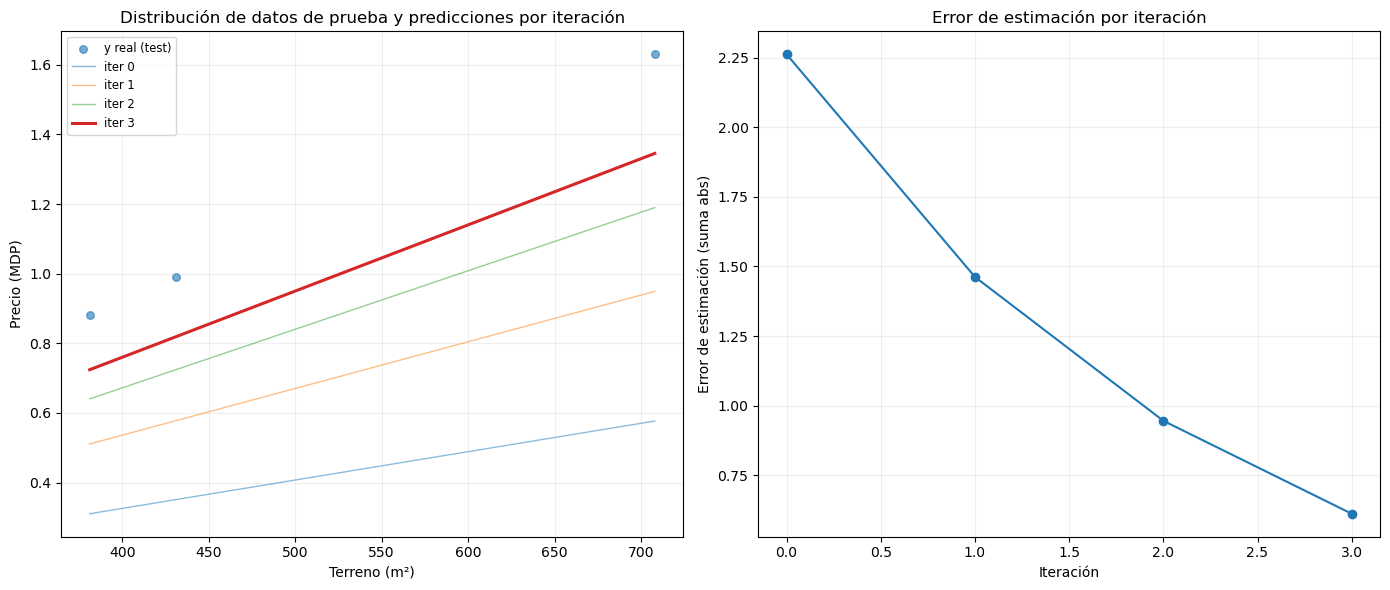

In [56]:
dataset = pd.read_csv('casas.csv')
initial_weight = 0.0  # Peso inicial
learning_rate = 0.00000007
n_iterations = 4

# División de datos
X_train, X_test, Y_train, Y_test = train_test_split(
    dataset.iloc[:, :-1], 
    dataset.iloc[:, -1], 
    test_size=0.3, 
    shuffle=True, 
    random_state=0
)

# Entrenamiento
best_weights, weights_history, errors_history, ypreds_history = batch_gradient_descent(
    X_train.values,
    X_test.values,
    Y_train.values, 
    Y_test.values,
    initial_weight,
    learning_rate, 
    n_iterations
)

# Predicción final (última iteración)
Y_pred_final = ypreds_history[-1]

# Mostrar resultados
print("\n=== RESULTADOS FINALES ===")
print(f"Peso final: {best_weights[0]:.6f}")
print(f"\nValores de y_test (len={len(Y_test)}): {Y_test[:10]} ...")
print(f"Valores de y_pred (última iteración) (len={len(Y_pred_final)}): {Y_pred_final[:10]} ...")
print(f"Error total en test (última iteración): {error(Y_test, Y_pred_final):.6f}")

# ---------------------------
# GRÁFICA 1: Datos de prueba + predicciones por iteración
# ---------------------------
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

X_train = X_train.values.reshape(-1, 1) if isinstance(X_train, pd.DataFrame) else np.array(X_train).reshape(-1, 1)
X_test  = X_test.values.reshape(-1, 1)  if isinstance(X_test, pd.DataFrame)  else np.array(X_test).reshape(-1, 1)
Y_train = Y_train.values if isinstance(Y_train, (pd.Series, pd.DataFrame)) else np.array(Y_train)
Y_test  = Y_test.values  if isinstance(Y_test, (pd.Series, pd.DataFrame))  else np.array(Y_test)
# ordenar por X para dibujar líneas suaves
x_test_flat = X_test.flatten()
sort_idx = np.argsort(x_test_flat)
x_sorted = x_test_flat[sort_idx]
y_test_sorted = Y_test[sort_idx]

# scatter de los datos reales
plt.scatter(x_sorted, y_test_sorted, label='y real (test)', alpha=0.6, s=30)

# seleccionar un subconjunto de iteraciones para no saturar
max_lines_to_plot = 8
if n_iterations <= max_lines_to_plot:
    iter_indices = list(range(n_iterations))
else:
    # tomar iteraciones distribuidas (incluye la primera y la última)
    iter_indices = np.unique(np.round(np.linspace(0, n_iterations - 1, max_lines_to_plot)).astype(int)).tolist()

# paleta simple con colormap
cmap = plt.get_cmap('viridis')
for idx_i, it in enumerate(iter_indices):
    ypred_sorted = ypreds_history[it][sort_idx]
    alpha = 0.5 if it != (n_iterations - 1) else 1.0
    linewidth = 1.0 if it != (n_iterations - 1) else 2.2
    plt.plot(x_sorted, ypred_sorted, label=f'iter {it}', alpha=alpha, linewidth=linewidth)

plt.xlabel('Terreno (m²)')
plt.ylabel('Precio (MDP)')
plt.title('Distribución de datos de prueba y predicciones por iteración')
plt.legend(fontsize='small')
plt.grid(alpha=0.2)

# ---------------------------
# GRÁFICA 2: Error vs iteración
# ---------------------------
plt.subplot(1, 2, 2)
plt.plot(range(n_iterations), errors_history, marker='o')
plt.xlabel('Iteración')
plt.ylabel('Error de estimación (suma abs)')
plt.title('Error de estimación por iteración')
plt.grid(alpha=0.2)

plt.tight_layout()
plt.show()
